In [23]:
import pandas as pd
import numpy as np
import networkx as nx
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import statsmodels.formula.api as smf
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn import preprocessing

import warnings
warnings.filterwarnings('ignore')

In [25]:


mg_noIBX_abs = pd.read_csv('https://raw.githubusercontent.com/CUSPADS2022IBX/IBXRidership/main/mg_noIBX_abs.csv', index_col=0).fillna(0)
mg_noIBX_norm = pd.read_csv('https://raw.githubusercontent.com/CUSPADS2022IBX/IBXRidership/main/mg_noIBX_norm.csv', index_col=0).fillna(0)
mg_noIBX_log = pd.read_csv('https://raw.githubusercontent.com/CUSPADS2022IBX/IBXRidership/main/mg_noIBX_log.csv', index_col=0).replace([np.inf, -np.inf], np.nan).fillna(0)

In [20]:
cols_offpeak = ['cs_noibx_offpeak','lotarea', 'bldgarea',
                'comarea', 'resarea', 'officearea', 'retailarea', 'garagearea',
                'strgearea', 'factryarea', 'otherarea', 'numbldgs', 'numfloors',
                'unitsres', 'unitstotal', 'assesstot', 'Total_pop_Num',
                'housed_pop_Num', 'group_house_pop_num', 'industrial_pop_num',
                'under18_num', 'hispanic_num', 'white_num', 'black_num', 'asian_num',
                'other_num', 'multirace_num', 'total_houses', 'occupied_homes_num',
                'vacant_homes_num', 'Bus_Stops']

cols_peak = ['cs_noibx_peak','lotarea', 'bldgarea',
             'comarea', 'resarea', 'officearea', 'retailarea', 'garagearea',
             'strgearea', 'factryarea', 'otherarea', 'numbldgs', 'numfloors',
             'unitsres', 'unitstotal', 'assesstot', 'Total_pop_Num',
             'housed_pop_Num', 'group_house_pop_num', 'industrial_pop_num',
             'under18_num', 'hispanic_num', 'white_num', 'black_num', 'asian_num',
             'other_num', 'multirace_num', 'total_houses', 'occupied_homes_num',
             'vacant_homes_num', 'Bus_Stops']
             
mg_noIBX_abs.columns

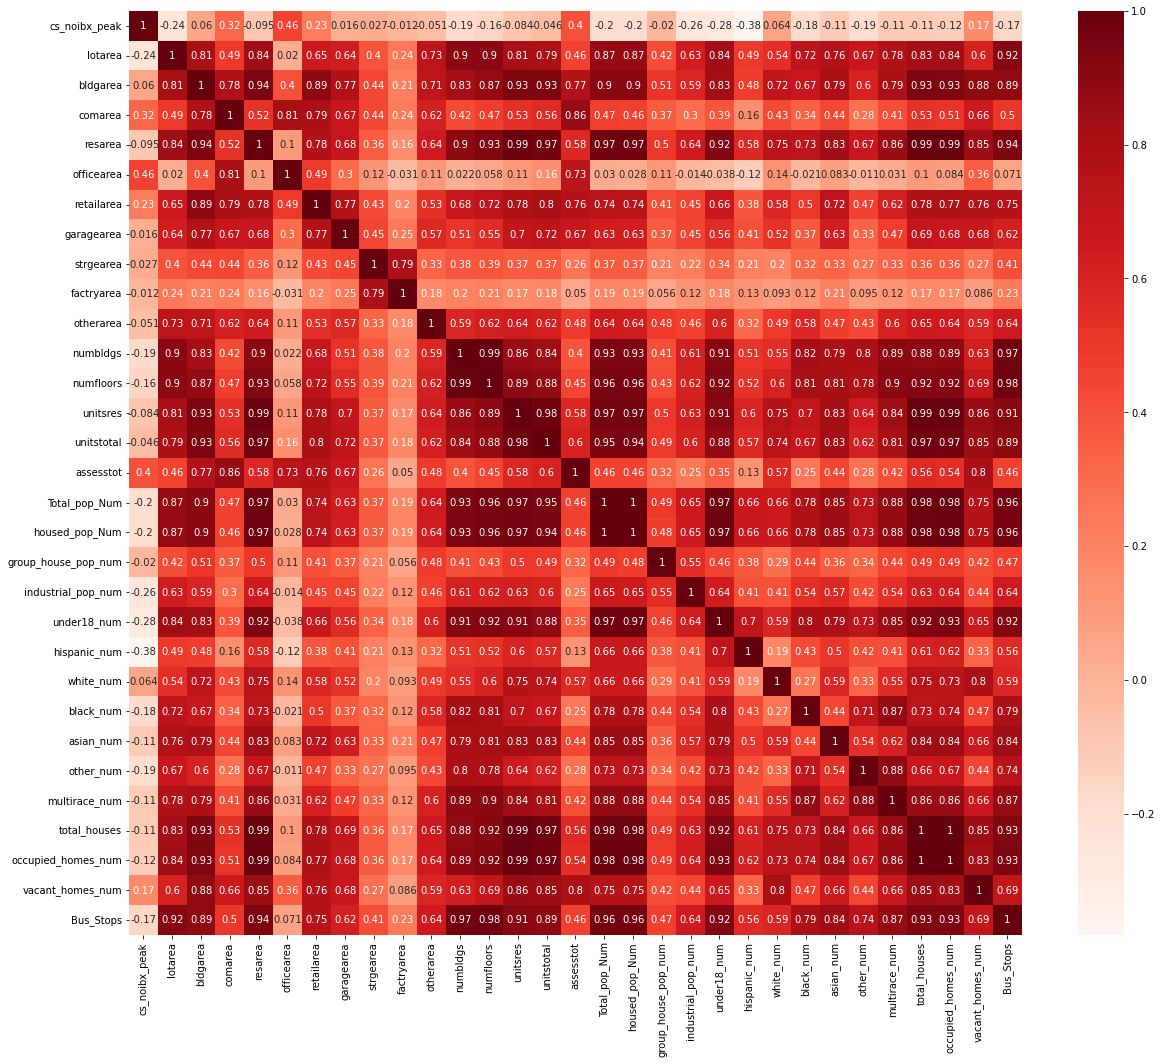

In [ ]:
#Using Pearson Correlation
plt.figure(figsize=(20,17))
cor = mg_noIBX_abs[cols_peak].corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [ ]:
turnstile_data =['exits_weekday_evening',
       'entries_weekday_evening', 'exits_weekday_morning',
       'entries_weekday_morning', 'exits_weekday_overnight',
       'entries_weekday_overnight', 'exits_weekend_evening',
       'entries_weekend_evening', 'exits_weekend_morning',
       'entries_weekend_morning', 'exits_weekend_overnight',
       'entries_weekend_overnight']

peak_nonpeak = ['cs_noibx_peak', 'cs_noibx_offpeak']

#Simple OLS on all variables
for commute_period in turnstile_data:
       if 'weekend' in commute_period:
              model=sm.OLS(mg_noIBX_abs[commute_period],mg_noIBX_abs[cols_offpeak]).fit()  
              print('{}:'.format(commute_period), model.rsquared)
       elif 'overnight' in data:
              model=sm.OLS(mg_noIBX_abs[commute_period],mg_noIBX_abs[cols_offpeak]).fit()  
              print('{}:'.format(commute_period),model.rsquared)
       else:
              model=sm.OLS(mg_noIBX_abs[commute_period],mg_noIBX_abs[cols_peak]).fit() 
              print('{}:'.format(commute_period), model.rsquared)

exits_weekday_evening: 0.6407875834023268
entries_weekday_evening: 0.7182556608899096
exits_weekday_morning: 0.7241339496380179
entries_weekday_morning: 0.6972823069208707
exits_weekday_overnight: 0.6399153086115277
entries_weekday_overnight: 0.5533396681243157
exits_weekend_evening: 0.6281433609137657
entries_weekend_evening: 0.6511150656848386
exits_weekend_morning: 0.6641448601470219
entries_weekend_morning: 0.6707783367467508
exits_weekend_overnight: 0.6134179659446968
entries_weekend_overnight: 0.5299385194004055


In [ ]:
#LassoCV scores on absolute values
for commute_period in turnstile_data:
       if 'weekend' in commute_period:
           Lasso_model = LassoCV(cv=5, random_state=0).fit(mg_noIBX_abs[cols_offpeak], mg_noIBX_abs[commute_period])
           print('{}:'.format(commute_period), Lasso_model.score(mg_noIBX_abs[cols_offpeak], mg_noIBX_abs[commute_period]))
           importance = np.abs(Lasso_model.coef_)
           idx_third = importance.argsort()[-5]
           threshold = importance[idx_third] + 0.01
           idx_features = (-importance).argsort()[:5]
           name_features = np.array(cols_offpeak)[idx_features]
           print('{} Selected Features: {}'.format(commute_period, name_features))
       elif 'overnight' in data:
           Lasso_model = LassoCV(cv=5, random_state=0).fit(mg_noIBX_abs[cols_offpeak], mg_noIBX_abs[commute_period])
           print('{}:'.format(commute_period), Lasso_model.score(mg_noIBX_abs[cols_offpeak], mg_noIBX_abs[commute_period]))
           importance = np.abs(Lasso_model.coef_)
           idx_third = importance.argsort()[-5]
           threshold = importance[idx_third] + 0.01
           idx_features = (-importance).argsort()[:5]
           name_features = np.array(cols_offpeak)[idx_features]
           print('{} Selected Features: {}'.format(commute_period, name_features))
       else:
           Lasso_model = LassoCV(cv=5, random_state=0).fit(mg_noIBX_abs[cols_peak], mg_noIBX_abs[commute_period])
           print('{}:'.format(commute_period), Lasso_model.score(mg_noIBX_abs[cols_peak], mg_noIBX_abs[commute_period]))
           importance = np.abs(Lasso_model.coef_)
           idx_third = importance.argsort()[-5]
           threshold = importance[idx_third] + 0.01
           idx_features = (-importance).argsort()[:5]
           name_features = np.array(cols_peak)[idx_features]
           print('{} Selected Features: {}'.format(commute_period, name_features))


exits_weekday_evening: 0.22494914923277776
exits_weekday_evening Selected Features: ['assesstot' 'occupied_homes_num' 'total_houses' 'multirace_num'
 'other_num']
entries_weekday_evening: 0.4429496382558601
entries_weekday_evening Selected Features: ['lotarea' 'assesstot' 'occupied_homes_num' 'total_houses' 'multirace_num']
exits_weekday_morning: 0.4579390796814051
exits_weekday_morning Selected Features: ['lotarea' 'assesstot' 'occupied_homes_num' 'total_houses' 'multirace_num']
entries_weekday_morning: 0.21015790016620584
entries_weekday_morning Selected Features: ['assesstot' 'occupied_homes_num' 'total_houses' 'multirace_num'
 'other_num']
exits_weekday_overnight: 0.22447645624729673
exits_weekday_overnight Selected Features: ['lotarea' 'bldgarea' 'assesstot' 'occupied_homes_num' 'total_houses']
entries_weekday_overnight: 0.2230433109081923
entries_weekday_overnight Selected Features: ['assesstot' 'occupied_homes_num' 'total_houses' 'multirace_num'
 'other_num']
exits_weekend_eveni

In [ ]:
#LassoCV scores on log values
for commute_period in turnstile_data:
       if 'weekend' in commute_period:
           Lasso_model = LassoCV(cv=5, random_state=0).fit(mg_noIBX_log[cols_offpeak], mg_noIBX_log[commute_period])
           print('{}:'.format(commute_period), Lasso_model.score(mg_noIBX_log[cols_offpeak], mg_noIBX_log[commute_period]))
           importance = np.abs(Lasso_model.coef_)
           idx_third = importance.argsort()[-5]
           threshold = importance[idx_third] + 0.01
           idx_features = (-importance).argsort()[:5]
           name_features = np.array(cols_offpeak)[idx_features]
           print('{} Selected Features: {}'.format(commute_period, name_features))
       elif 'overnight' in data:
           Lasso_model = LassoCV(cv=5, random_state=0).fit(mg_noIBX_log[cols_offpeak], mg_noIBX_log[commute_period])
           print('{}:'.format(commute_period), Lasso_model.score(mg_noIBX_log[cols_offpeak], mg_noIBX_log[commute_period]))
           importance = np.abs(Lasso_model.coef_)
           idx_third = importance.argsort()[-5]
           threshold = importance[idx_third] + 0.01
           idx_features = (-importance).argsort()[:5]
           name_features = np.array(cols_offpeak)[idx_features]
           print('{} Selected Features: {}'.format(commute_period, name_features))
       else:
           Lasso_model = LassoCV(cv=5, random_state=0).fit(mg_noIBX_log[cols_peak], mg_noIBX_log[commute_period])
           print('{}:'.format(commute_period), Lasso_model.score(mg_noIBX_log[cols_peak], mg_noIBX_log[commute_period]))
           importance = np.abs(Lasso_model.coef_)
           idx_third = importance.argsort()[-5]
           threshold = importance[idx_third] + 0.01
           idx_features = (-importance).argsort()[:5]
           name_features = np.array(cols_peak)[idx_features]
           print('{} Selected Features: {}'.format(commute_period, name_features))

exits_weekday_evening: 0.4186681597325663
exits_weekday_evening Selected Features: ['resarea' 'occupied_homes_num' 'unitstotal' 'numfloors' 'numbldgs']
entries_weekday_evening: 0.637758094796826
entries_weekday_evening Selected Features: ['assesstot' 'lotarea' 'retailarea' 'Bus_Stops' 'numbldgs']
exits_weekday_morning: 0.5845377685164707
exits_weekday_morning Selected Features: ['assesstot' 'lotarea' 'Bus_Stops' 'retailarea' 'unitstotal']
entries_weekday_morning: 0.48922292625725394
entries_weekday_morning Selected Features: ['resarea' 'occupied_homes_num' 'total_houses' 'unitstotal' 'numbldgs']
exits_weekday_overnight: 0.42321388745819855
exits_weekday_overnight Selected Features: ['resarea' 'numfloors' 'numbldgs' 'lotarea' 'Bus_Stops']
entries_weekday_overnight: 0.4862974536597705
entries_weekday_overnight Selected Features: ['assesstot' 'retailarea' 'white_num' 'Bus_Stops' 'lotarea']
exits_weekend_evening: 0.512103790318198
exits_weekend_evening Selected Features: ['resarea' 'assess

In [ ]:
#LassoCV scores on norm values
for commute_period in turnstile_data:
       if 'weekend' in commute_period:
           Lasso_model = LassoCV(cv=5, random_state=0).fit(mg_noIBX_norm[cols_offpeak], mg_noIBX_norm[commute_period])
           print('{}:'.format(commute_period), Lasso_model.score(mg_noIBX_norm[cols_offpeak], mg_noIBX_norm[commute_period]))
           importance = np.abs(Lasso_model.coef_)
           idx_third = importance.argsort()[-5]
           threshold = importance[idx_third] + 0.01
           idx_features = (-importance).argsort()[:5]
           name_features = np.array(cols_offpeak)[idx_features]
           print('{} Selected Features: {}'.format(commute_period, name_features))
       elif 'overnight' in data:
           Lasso_model = LassoCV(cv=5, random_state=0).fit(mg_noIBX_norm[cols_offpeak], mg_noIBX_norm[commute_period])
           print('{}:'.format(commute_period), Lasso_model.score(mg_noIBX_norm[cols_offpeak], mg_noIBX_norm[commute_period]))
           importance = np.abs(Lasso_model.coef_)
           idx_third = importance.argsort()[-5]
           threshold = importance[idx_third] + 0.01
           idx_features = (-importance).argsort()[:5]
           name_features = np.array(cols_offpeak)[idx_features]
           print('{} Selected Features: {}'.format(commute_period, name_features))
       else:
           Lasso_model = LassoCV(cv=5, random_state=0).fit(mg_noIBX_norm[cols_peak], mg_noIBX_norm[commute_period])
           print('{}:'.format(commute_period), Lasso_model.score(mg_noIBX_norm[cols_peak], mg_noIBX_norm[commute_period]))
           importance = np.abs(Lasso_model.coef_)
           idx_third = importance.argsort()[-5]
           threshold = importance[idx_third] + 0.01
           idx_features = (-importance).argsort()[:5]
           name_features = np.array(cols_peak)[idx_features]
           print('{} Selected Features: {}'.format(commute_period, name_features))

exits_weekday_evening: 0.16583954241927457
exits_weekday_evening Selected Features: ['assesstot' 'Bus_Stops' 'bldgarea' 'occupied_homes_num' 'total_houses']
entries_weekday_evening: 0.37390638563580814
entries_weekday_evening Selected Features: ['assesstot' 'Bus_Stops' 'bldgarea' 'occupied_homes_num' 'total_houses']
exits_weekday_morning: 0.36744229724848576
exits_weekday_morning Selected Features: ['assesstot' 'Bus_Stops' 'bldgarea' 'occupied_homes_num' 'total_houses']
entries_weekday_morning: 0.14820306404768646
entries_weekday_morning Selected Features: ['Bus_Stops' 'assesstot' 'bldgarea' 'occupied_homes_num' 'total_houses']
exits_weekday_overnight: 0.12857621808988406
exits_weekday_overnight Selected Features: ['assesstot' 'Bus_Stops' 'bldgarea' 'occupied_homes_num' 'total_houses']
entries_weekday_overnight: 0.1906969334308395
entries_weekday_overnight Selected Features: ['Bus_Stops' 'assesstot' 'bldgarea' 'occupied_homes_num' 'total_houses']
exits_weekend_evening: 0.20595463215445

In [ ]:
# make a pipeline - specify the model
pipe = Pipeline([("scale", preprocessing.StandardScaler()),
                 ("reduce_dims", PCA()),
                 ("lasso", Lasso())
                ])

grid = GridSearchCV(pipe, param_grid=param_grid, verbose=True,n_jobs=-1, cv=5)


param_grid = dict(reduce_dims__n_components = np.arange(1,31,1),
                  lasso__alpha = 2.0**(np.arange(-10, 10, 1)))
                  
#for commute_period in turnstile_data:
 #      if 'weekend' in commute_period:
  #            model=sm.OLS(mg_noIBX_abs[commute_period],mg_noIBX_abs[cols_offpeak]).fit()  
   #           print('{}:'.format(commute_period), model.rsquared)
    #   elif 'overnight' in data:
     #         model=sm.OLS(mg_noIBX_abs[commute_period],mg_noIBX_abs[cols_offpeak]).fit()  
      #        print('{}:'.format(commute_period),model.rsquared)
       #else:
        #      model=sm.OLS(mg_noIBX_abs[commute_period],mg_noIBX_abs[cols_peak]).fit() 
         #     print('{}:'.format(commute_period), model.rsquared)





grid.fit(mg_noIBX_log[cols_peak], mg_noIBX_log['entries_weekend_morning'])
grid.best_score_
grid.best_estimator_
grid.

Fitting 5 folds for each of 600 candidates, totalling 3000 fits


{'mean_fit_time': array([0.01800017, 0.01383052, 0.00522676, 0.0053679 , 0.00451546,
        0.00504541, 0.00441623, 0.00431223, 0.00424857, 0.00480337,
        0.00514565, 0.00426197, 0.00492282, 0.00502553, 0.00627737,
        0.00510616, 0.00765438, 0.00449224, 0.00808563, 0.0075881 ,
        0.01056828, 0.00862141, 0.00974836, 0.00974617, 0.01196508,
        0.00819526, 0.01417198, 0.00763669, 0.01111798, 0.01048188,
        0.00668554, 0.00839019, 0.01021419, 0.0073092 , 0.00705123,
        0.00752592, 0.00813327, 0.00708456, 0.00474005, 0.00503697,
        0.00523047, 0.00632315, 0.00859232, 0.00659919, 0.00534225,
        0.00538034, 0.00531192, 0.00593429, 0.00830879, 0.00697937,
        0.00427818, 0.00742054, 0.00485706, 0.01025448, 0.00734448,
        0.00386605, 0.00380387, 0.00390296, 0.00604248, 0.00974674,
        0.00620265, 0.00383015, 0.00479522, 0.00714765, 0.00617085,
        0.00500693, 0.00567803, 0.0071866 , 0.00813861, 0.00954199,
        0.00736833, 0.00611267,

entries weekday evening: 0.637758094796826


#### Predicting on IBX

In [17]:
#bringing in ibx vals 
mg_IBX_log= pd.read_csv('https://raw.githubusercontent.com/CUSPADS2022IBX/IBXRidership/main/mg_IBX_log.csv', index_col=0).replace([np.inf, -np.inf], np.nan).fillna(0)

In [21]:
#column 
pd.set_option("max_columns",None)

mg_IBX_log[cols_peak]

,cs_noibx_peak,lotarea,bldgarea,comarea,resarea,officearea,retailarea,garagearea,strgearea,factryarea,otherarea,numbldgs,numfloors,unitsres,unitstotal,assesstot,Total_pop_Num,housed_pop_Num,group_house_pop_num,industrial_pop_num,under18_num,hispanic_num,white_num,black_num,asian_num,other_num,multirace_num,total_houses,occupied_homes_num,vacant_homes_num,Bus_Stops
0,0.022649,17.176532,16.804436,15.953090,16.121817,15.118614,13.981659,13.416794,11.379504,0.000000,14.865894,5.441807,7.521062,9.202417,9.297202,22.413495,9.565326,9.465567,7.210859,0.000000,7.162108,7.400550,9.066257,6.512964,7.861286,4.924112,6.328502,9.145854,8.953269,7.403888,2.397895
1,0.025604,14.506276,17.000460,16.753350,14.532418,16.546370,14.438212,13.416450,11.883972,11.722243,13.495088,5.510321,7.773062,8.049264,8.834892,21.975019,8.373668,8.274022,6.018126,2.126210,5.656837,6.620946,7.602159,6.226590,6.778487,3.789882,5.006003,7.982613,7.836907,5.984474,2.890372
2,0.024396,14.469056,16.220843,15.337286,15.643442,14.781552,13.904540,11.834275,10.461507,6.114055,13.439245,6.209202,7.771772,8.771715,8.923793,21.231665,9.154886,9.115320,5.905372,0.000000,6.800501,6.534675,8.897048,5.381914,6.623880,4.509522,5.992456,8.732054,8.599332,6.646924,2.484907
3,0.020454,14.625534,16.628983,16.555316,13.656281,16.459191,13.008251,11.982601,10.800689,0.000000,13.546347,4.306503,6.832801,6.662666,7.556642,21.118966,7.289724,7.202723,4.804696,0.000000,5.423996,5.088634,6.726508,4.698012,5.558468,3.146468,4.335468,6.705453,6.487561,5.074730,3.332205
4,0.021334,15.226605,16.633740,16.051804,15.751470,15.573796,13.651135,13.365192,10.936123,6.755406,14.510455,6.610873,8.036290,8.825230,10.169038,21.244375,9.374996,9.329976,6.251934,2.422242,7.535379,6.954249,8.998152,6.174906,7.205239,4.551903,6.596243,8.740397,8.654181,6.246708,3.555348
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
428,0.000000,17.315595,16.915045,15.162371,16.622881,12.498806,13.815900,11.808350,13.322100,12.815127,14.196291,9.335650,9.870201,9.784794,9.832552,20.691864,10.871812,10.855365,6.755952,5.197358,9.225790,9.422751,9.717088,6.755863,9.990149,5.722340,6.592920,9.841011,9.776118,7.073734,3.555348
429,0.000000,16.337227,16.237499,15.228099,15.670086,11.909162,12.604556,14.301581,13.081238,13.296409,13.773536,8.175166,8.753446,8.845926,8.908324,19.959706,9.888236,9.866207,6.061831,3.449770,8.314333,8.738058,8.167956,6.136746,9.108927,5.011421,5.659921,8.775783,8.711885,5.993530,3.583519
430,0.000000,19.788048,18.267416,17.314326,17.618225,14.970757,15.981062,15.564852,14.476052,14.244103,16.293346,10.442446,10.829469,10.663998,10.742832,22.827303,11.764486,11.756176,6.970055,5.537552,10.131798,9.205094,10.393846,11.180564,8.797995,7.259139,8.737549,10.763050,10.700849,7.954728,1.945910
431,0.000000,17.633641,17.288487,15.835992,16.908063,13.796346,13.983117,13.385837,13.785210,13.260181,14.968733,9.409484,10.047012,9.995713,10.054970,20.794326,11.169406,11.165864,5.524698,1.371506,9.529168,8.316625,8.893609,10.892198,7.174642,6.584444,8.233614,10.142609,10.093860,7.097247,2.397895


##### Training to Predict Entries and Exits with IBX

In [37]:
#get rows in same order 
#only need for IBX one - model prediction 
#sort by complex ID 
mg_IBX_log = mg_IBX_log.sort_values('complex_id')

In [203]:
#fitting on entries and getting entries for IBX as prediction 
Lasso_model = LassoCV(cv=5, random_state=0).fit(mg_noIBX_log[cols_peak], mg_noIBX_log['entries_weekday_evening'])

#entries_weekday_evening
print('{}:'.format('entries weekday evening'), Lasso_model.score(mg_noIBX_log[cols_peak], mg_noIBX_log['entries_weekday_evening']))


entries_preds = Lasso_model.predict(mg_IBX_log[cols_peak])

entries weekday evening: 0.637758094796826


In [202]:
#fitting on exits and getting entries for IBX as prediction 
Lasso_model = LassoCV(cv=5, random_state=0).fit(mg_noIBX_log[cols_peak], mg_noIBX_log['exits_weekday_evening'])

#entries_weekday_evening
print('{}:'.format('exits weekday evening'), Lasso_model.score(mg_noIBX_log[cols_peak], mg_noIBX_log['exits_weekday_evening']))


exits_preds = Lasso_model.predict(mg_IBX_log[cols_peak])

exits weekday evening: 0.41866815959007275


In [318]:
#create empty dataframe with columns and indexes as complex ID 

mg_noIBX_log['exits_weekday_evening']
mg_noIBX_log['entries_weekday_evening']

,complex_id,Stop Name,Complex_id,exits_weekday_evening,entries_weekday_evening,exits_weekday_morning,entries_weekday_morning,exits_weekday_overnight,entries_weekday_overnight,exits_weekend_evening,entries_weekend_evening,exits_weekend_morning,entries_weekend_morning,exits_weekend_overnight,entries_weekend_overnight,cs_ibx_peak,cs_ibx_offpeak,cs_noibx_peak,cs_noibx_offpeak,VoroID,lotarea,bldgarea,comarea,resarea,officearea,retailarea,garagearea,strgearea,factryarea,otherarea,numbldgs,numfloors,unitsres,unitstotal,assesstot,Total_pop_Num,housed_pop_Num,group_house_pop_num,industrial_pop_num,under18_num,hispanic_num,white_num,black_num,asian_num,other_num,multirace_num,total_houses,occupied_homes_num,vacant_homes_num,Bus_Stops,geometry,Complex ID,boro,lat,long
400,1,ASTORIA-DITMARS BLVD,R01,8.652707,7.403792,8.148287,8.528484,6.132693,5.475522,8.017204,7.106760,7.674095,7.661939,6.426691,4.908049,0.016242,0.010671,0.016281,0.010718,70.0,17.630596,16.975899,15.701532,16.575058,13.724625,13.909945,13.363050,13.978097,14.116205,14.160365,9.062799,9.519403,9.850441,9.943320,21.132556,10.686734,10.680074,5.671646,0.000000,8.783198,9.086447,10.213574,6.943512,8.410315,6.302721,7.371530,9.911190,9.850095,7.085475,4.204693,MULTIPOLYGON (((1009459.8773626394 218152.2372...,1,Q,40.775036,-73.912034
408,10,49 ST,R15,8.461638,8.514505,8.931188,8.060501,6.083417,5.744684,8.486966,8.321832,8.538979,7.855738,6.474373,6.325367,0.022245,0.013315,0.022382,0.013371,307.0,13.669265,16.425204,16.071395,13.755709,15.830454,14.032714,12.162063,12.058400,0.000000,12.987466,4.250825,6.850687,7.084588,7.625215,21.607284,7.491832,7.308456,5.705329,3.784344,4.876557,5.710162,6.369599,5.702556,6.287261,3.188194,3.829414,7.149632,6.887089,5.683890,0.693147,POLYGON ((989185.1866888272 216357.86476792034...,10,M,40.759901,-73.984139
385,100,HEWES ST,M14,6.842657,6.363287,6.721727,6.334966,5.211806,4.220977,6.578296,5.851664,6.042039,5.622211,5.622437,4.327438,0.020128,0.012387,0.020046,0.012377,179.0,14.534087,15.337841,14.101496,14.923624,12.378465,12.281295,11.002797,9.177329,11.358155,13.490262,6.537753,7.653371,8.110755,8.202652,19.212147,9.207392,9.198816,4.444276,1.685130,8.131600,7.798253,8.817585,4.953395,5.392477,5.272092,5.420767,8.110404,8.030336,5.545750,1.945910,"POLYGON ((996888.2585780247 198332.7126279529,...",100,Bk,40.706870,-73.953431
386,101,MARCY AV,M16,8.269411,7.801606,8.124284,7.646867,6.278850,5.635057,7.918560,7.270791,7.534562,6.898084,6.626801,5.833531,0.020578,0.012626,0.020522,0.012624,180.0,16.434464,17.075895,15.912474,16.670518,14.251774,14.101396,12.921272,12.471208,13.307646,15.198090,7.709226,8.821562,9.781926,9.861856,21.144624,10.792410,10.786134,5.718285,4.946630,9.666835,9.222319,10.396247,7.622212,7.311999,6.875067,7.157745,9.800038,9.719475,7.241308,4.060443,POLYGON ((995891.3762889279 194519.11313010252...,101,Bk,40.708359,-73.957757
387,103,BOWERY,M19,6.841776,6.487874,7.250511,6.326105,4.791442,3.824284,7.013747,6.454904,7.322717,6.080791,5.368601,4.912655,0.020696,0.011852,0.020766,0.011917,279.0,13.767938,15.216583,14.393646,14.522429,13.420507,13.348530,10.955179,10.905860,8.832096,12.803664,5.488691,7.056912,7.920266,8.145508,20.151044,8.550787,8.475888,5.921961,0.000000,6.155664,6.606777,7.563697,5.451459,7.626830,4.006081,5.095052,7.912346,7.806271,5.616165,1.098612,POLYGON ((986852.7345749646 201652.06074943082...,103,M,40.720280,-73.993915
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357,95,GATES AV,J30,7.134074,6.931692,6.462132,7.479215,5.629508,4.824707,6.613049,6.547592,5.826553,6.671083,5.768712,4.747104,0.017714,0.010729,0.017565,0.010743,151.0,15.443623,15.941735,14.112842,15.664420,11.646843,12.767356,10.515421,10.592798,9.977850,13.570278,7.569214,8.495740,8.893599,8.932900,19.727933,9.772230,9.741209,6.283680,0.000000,7.896

In [204]:

exits_preds = list(map(lambda x: np.e**x,exits_preds))
entries_preds = list(map(lambda x: np.e**x,entries_preds))

In [419]:
#with actual - exits and entries 
exits_preds = list(map(lambda x: np.e**x,mg_noIBX_log['exits_weekday_overnight']))
entries_preds = list(map(lambda x: np.e**x,mg_noIBX_log['entries_weekday_overnight']))

In [420]:
#array of arrays 
#change number 424 or 433
exits = np.tile(exits_preds, [424,1])
entries = np.tile(entries_preds, [424,1])

In [71]:
#multiply by 433 
#then transpose same one for other one 

In [421]:
exits_df = pd.DataFrame(exits)
entries_df = pd.DataFrame(entries).transpose()

In [403]:
exits_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423
0,3457.45,7564.25,830.25,3375.45,1408.825,958.425,1311.125,854.375,496.9,423.4,991.25,593.425,2514.8,9602.375,9302.102564,1939.55,3050.825,1211.625,1803.025,697.45,1043.7,1323.925,4389.725,1077.8,399.275,343.55,759.875,788.3,963.75,830.35,666.675,4305.625,464.45,862.425,64.3,445.3,1728.85,1741.8,723.575,438.8,7260.875,1541.225,9209.8,1500.925,1046.6,741.2,3098.075,4122.25,4536.875,3996.1,3185.325,4929.775,22828.875,5556.2,11242.9,1161.35,7397.85,4184.4,4680.225,3851.075,547.65,2023.525,4733.4,1778.95,2424.15,723.85,737.25,454.25,572.9,429.2,1165.75,1217.5,243.625,158.05,391.075,165.825,97.475,1353.4,42.95,348.625,135.15,23.125,2148.3,1283.05,126.675,164.7,84.7,227.95,451.1,476.925,238.75,291.975,619.0,1606.4,1198.525,836.7,1298.75,1976.05,675.5,1600.175,969.575,999.625,1290.575,922.825,580.7,3236.475,2160.175,10144.075,5647.175,26490.9,9682.875,8992.975,5283.625,3094.875,2901.375,2957.925,2215.2,2522.7,2260.375,674.525,372.225,1912.725,565.85,1020.825,321.375,186.575,279.9,343.725,811.025,251.05,735.525,265.025,2187.875,2090.65,2055.025,599.125,811.475,5054.925,4914.4,357.575,3205.425,1154.2,1878.75,3119.35,2955.15,1152.625,520.35,1335.925,1822.975,3539.35,1093.525,4405.25,11774.25,6340.65,9013.275,7204.425,1791.425,1339.35,840.7,2673.8,3705.7,1096.9,1495.5,743.075,1344.5,1717.65,874.4,2031.5,816.525,100.425,330.925,335.3,274.65,1082.625,1499.125,2962.2,1905.475,2932.25,3464.575,1574.775,2203.325,2934.325,3341.0,3239.725,2217.475,1709.9,1223.5,10059.1,5827.55,3548.45,10928.5,7589.575,9588.0,17080.85,3720.1,3369.8,3817.15,2204.925,2973.35,3323.25,1769.275,1146.1,7613.25,3560.275,1701.725,1429.375,7207.325,2.638889,2803.35,3815.65,1003.375,2958.25,966.45,1538.125,1208.525,1327.275,5428.1,2260.65,1412.525,1666.15,1065.575,3866.4,822.45,814.575,1766.925,1422.25,985.475,476.45,527.575,279.05,1052.35,3145.125,1444.175,1397.575,642.05,456.85,2436.75,614.9,1880.425,2798.575,1071.3,1631.625,1520.15,553.0,738.9,2952.4,1141.125,1265.375,823.175,958.35,1760.075,1683.55,561.775,1166.275,2983.3,1801.55,1290.925,778.65,992.125,1796.5,1319.95,1250.125,2268.55,3151.3,988.125,1536.025,8921.675,3528.825,3994.55,4703.225,3307.35,17634.825,11112.675,9957.125,2766.45,7678.6,6789.975,8866.775,4854.725,4599.025,2082.375,3617.675,10576.825,1211.9,418.425,494.25,532.225,2545.1,447.25,2290.025,345.625,603.275,1056.8,345.3,1368.125,1316.875,1826.575,1118.975,845.725,691.55,992.125,707.15,379.275,47

In [404]:
entries_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423
0,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775,5056.775

In [422]:
#MAKE SURE TO CHANGE HERE WEATHER PEAK OR OFF PEAK TIMES 
tt_IBX_peak = pd.read_csv('https://raw.githubusercontent.com/CUSPADS2022IBX/IBXRidership/main/Models/tt_IBX_peak.csv',index_col = 'Complex ID')
tt_IBX_offpeak = pd.read_csv('https://raw.githubusercontent.com/CUSPADS2022IBX/IBXRidership/main/Models/tt_IBX_offpeak.csv',index_col = 'Complex ID')
tt_noIBX_peak = pd.read_csv('https://raw.githubusercontent.com/CUSPADS2022IBX/IBXRidership/main/Models/tt_noIBX_peak.csv',index_col = 'Complex ID')
tt_noIBX_offpeak = pd.read_csv('https://raw.githubusercontent.com/CUSPADS2022IBX/IBXRidership/main/Models/tt_noIBX_offpeak.csv',index_col = 'Complex ID')

#this if ibx 
tt_peak = tt_IBX_peak.apply(lambda x: 1/x**2)
tt_offpeak = tt_IBX_offpeak.apply(lambda x: 1/x**2)

#this is non ibx 
tt_peak = tt_noIBX_peak.apply(lambda x: 1/x**2)
tt_offpeak = tt_noIBX_offpeak.apply(lambda x: 1/x**2)

In [423]:
#replacing infinity 
tt_peak = tt_peak.replace([np.inf, -np.inf], 0)
tt_offpeak = tt_offpeak.replace([np.inf, -np.inf], 0)

#tt_peak.index = tt_peak.index.to_flat_index()
#reset index 
tt_peak.index.name = None
tt_offpeak.index.name = None

In [424]:
#multiplying entries and exits 
entries_x_exits = entries_df.multiply(exits_df)

In [425]:
entries_x_exits

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423
0,109997.673125,104708.806875,43797.304375,127308.860625,28766.418125,27506.88,29817.028125,113734.501875,66779.398125,51951.470625,58720.741875,64296.138125,30873.6075,140608.628125,126091.108125,54655.5975,50286.015,42609.39875,48710.1,17794.706875,24462.49875,53133.406875,48978.721875,43725.671875,19275.111875,8948.093125,59574.3625,31004.93375,79183.759375,67997.150625,36699.7175,34580.589375,24187.9075,85421.75625,10344.926875,11497.01625,189861.94125,47832.601875,98136.525,59150.536875,208122.259375,67686.743125,183080.73125,77422.79375,62027.775625,65024.401875,26647.29,27238.258125,50954.585,43063.07125,21656.8925,79655.34,324369.868125,58696.864375,412418.149375,10398.65125,71226.5825,37469.766875,49169.741875,58816.251875,38574.10125,43474.958125,125338.966875,65000.524375,244338.4575,57526.866875,58828.190625,24778.875625,54219.833125,45588.116875,36407.218125,49629.38375,53234.88625,21167.40375,32198.80875,3886.063125,11622.373125,43498.835625,4214.37875,24384.896875,4130.8075,4876.979375,78336.108125,10715.028125,14535.428125,12696.860625,6637.945,16887.361875,16845.57625,17054.504375,11377.62875,11717.883125,22964.185625,54643.65875,158039.203125,88215.42375,154296.405,76551.265,34138.855625,197514.68,25471.323125,115949.14,60786.145625,9742.02,33094.215,86311.193125,38144.30625,120253.059375,90268.88875,184877.513125,78007.7925,82353.4975,81858.039375,44203.221875,60792.115,95689.08125,18540.87875,32771.86875,55568.911875,51682.84875,23811.836875,49372.700625,29088.764375,12965.4825,8798.85875,4083.0525,11938.75,4805.346875,28658.969375,7163.25,13186.349375,8339.216875,83207.118125,61138.33875,74688.82,59520.638125,26683.10625,279563.739375,70014.799375,6805.0875,187098.120625,21650.923125,40514.148125,175911.511875,71489.235,26468.20875,60499.615625,79535.9525,123404.889375,59484.821875,21943.4225,200797.83625,90710.6225,151132.63625,254462.5175,172604.478125,35422.27125,89713.736875,30390.088125,51987.286875,54470.546875,65454.196875,35619.260625,80431.35875,53760.19125,34556.711875,37648.848125,23113.42,27578.5125,10303.14125,8942.12375,6996.1075,5509.733125,24128.21375,40645.474375,96435.253125,37529.460625,93701.279375,98787.186875,193509.229375,114140.419375,250988.34125,64475.219375,82866.86375,131469.515,117226.58625,36066.96375,532689.116875,205883.74375,110117.060625,344504.57,149079.17125,113835.98125,495911.7975,113227.105,135779.40375,127481.9

In [426]:
#match indexes 
entries_x_exits.index = tt_offpeak.index

In [427]:
#match column names 
entries_x_exits.columns = tt_offpeak.columns

In [428]:
#prebalanced - multiplying entries x exits x impedence (inverse travel time squareed )
prebalanced_df = entries_x_exits.multiply(tt_offpeak)

In [429]:
prebalanced_df

,1,10,100,101,103,107,108,109,110,111,113,114,118,119,120,122,123,124,125,126,127,129,13,130,131,133,134,135,136,137,138,14,141,143,144,145,146,147,149,150,151,152,153,154,155,156,157,158,159,16,160,162,164,165,167,168,169,17,173,175,176,177,179,180,181,182,183,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,2,20,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,22,220,221,222,223,224,225,228,231,232,234,235,236,237,238,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,26,260,261,262,263,264,265,266,268,269,270,271,272,273,276,277,278,279,28,280,282,283,284,286,287,288,289,290,291,292,293,294,295,296,297,298,299,3,30,300,301,303,304,305,306,307,308,309,31,310,311,312,313,314,316,318,319,32,320,321,323,324,325,326,327,328,329,33,333,334,336,337,339,34,340,341,343,344,345,346,347,348,349,35,350,351,352,353,354,355,356,357,358,359,36,360,361,362,363,364,365,366,367,368,369,37,370,371,372,373,374,375,376,377,378,379,38,380,381,382,383,384,385,386,387,388,39,391,392,393,394,395,396,397,398,399,4,403,404,405,407,409,41,413,414,416,417,418,419,42,420,421,422,423,424,425,426,427,428,429,43,430,431,432,433,434,436,437,438,439,44,440,441,442,443,444,445,446,447,448,449,45,450,451,452,453,455,456,457,458,459,46,460,461,463,464,47,471,475,476,477,48,49,5,50,51,52,53,54,55,56,57,58,59,6,60,601,602,603,604,605,606,607,608,609,61,610,611,612,613,614,615,616,617,618,619,62,620,621,622,623,624,625,626,627,628,629,630,635,636,64,65,66,67,68,69,70,71,72,74,75,76,77,78,79,8,80,81,82,83,84,85,86,87,88,89,9,90,91,93,94,95,96,97,98,99
1,0.000000,43.095539,3.901919,11.553100,2.996001,2.735308,2.039014,8.028223,4.838922,3.832975,4.550344,5.124778,3.584087,15.979119,12.680409,5.207528,4.704733,3.904802,4.350047,1.531224,2.061840,4.205995,17.154246,3.356659,1.440878,0.646626,4.194894,2.133439,5.326564,4.422267,2.345150,11.623614,1.242535,6.292425,0.781486,0.899064,15.348807,3.942047,8.405056,5.196297,17.939113,6.338564,17.890872,7.745775,6.362562,6.841876,2.876007,3.039920,5.837067,13.040109,2.569019,10.224949,41.778248,7.295562,48.398491,1.159268,7.714212,10.640405,4.657288,5.283490,3.313089,3.622699,9.987782,4.980367,18.289946,4.134999,4.113844,1.648302,3.535796,2.888167,2.286198,3.051753,3.211575,1.250437,1.862398,0.220883,0.649090,2.386017,0.231685,1.340555,0.220640,0.218416,77.901173,2.717843,0.610811,0.523961,0.269212,0.671578,0.703008,0.697647,0.452248,0.456922,0.877240,2.051242,9.451675,5.791554,10.434113,5.306378,2.418500,14.356824,1.894472,8.868929,4.777412,2.315059,2.799901,12.500120,5.842086,52.075237,14.042941,27.543253,10.521886,8.915198,9.588424,4.910085,6.333683,9.219010,1.730389,2.962861,4.711154,4.266462,1.880963,3.777743,2.151181,0.933335,0.621748,0.283121,0.808931,0.317516,1.850970,0.449796,0.807529,0.494213,6.148855,4.669577,5.904041,4.830605,2.241298,24.521582,7.367988,0.614151,17.402632,2.045134,3.991009,17.997000,7.627036,2.935423,7.091776,9.712051,15.706498,7.853023,3.050024,29.426598,11.137591,19.068679,15.881234,10.999106,3.352000,5.874775,2.367988,3.835033,3.903505,4.357994,2.319787,5.121975,3.346799,2.111150,2.256104,1.352145,1.742007,0.664016,0.592173,0.474603,0.384396,1.723950,2.988298,89.204587,3.291490,7.076882,7.683804,16.333757,10.035968,22.631253,6.027832,8.105038,13.143826,12.006033,3.058314,56.384491,22.492149,12.392220,40.002055,17.764935,14.515935,63.751939,14.254377,21.186303,15.722303,2.824467,5.283698,8.343310,4.348355,2.389368,6.285704,10.978554,2.250210,3.282741,7.530205,0.021585,2.619050,5.072401,1.724672,7.259100,0.963892,1.659096,2.545879,2.272469,11.336117,4.002768,3.186909,3.287310,1.633398,12.856635,1.160361,1.679208,3.776723,2.267523,1.987468,0.999277,2.068466,0.609823,6.159664,11.727676,2.297377,2.183659,4.189582,2.185370,3.181105,3.172868,5.218256,22.312854,4.712101,5.901803,15.449534,0.682545,2.325987,14.517465,5.902378,10.118587,1.900927,4.403828,12.942890,14.485173,1.776669,6.484723,3.108310,3.094764,6.772476,2.071607,3.151159,5.1

Index(['1', '10', '100', '101', '103', '107', '108', '109', '110', '111',
       ...
       '9', '90', '91', '93', '94', '95', '96', '97', '98', '99'],
      dtype='object', length=424)

In [430]:
#creating empty df 
df_daily_balanced = pd.DataFrame(index = prebalanced_df.index,columns = prebalanced_df.index).fillna(0)

In [431]:
prebalanced_df.columns = prebalanced_df.columns.astype(int)

In [432]:
#getting entries and exits as same column names 
entries_df.index = df_daily_balanced.index
exits_df.index = df_daily_balanced.index
entries_df.columns = df_daily_balanced.columns
exits_df.columns = df_daily_balanced.columns

In [415]:
df_daily_balanced.columns

Int64Index([  1,  10, 100, 101, 103, 107, 108, 109, 110, 111,
            ...
              9,  90,  91,  93,  94,  95,  96,  97,  98,  99],
           dtype='int64', length=424)

In [377]:
#entries_df.index = entries_df.index.astype(str)

In [433]:
#row normalizing
for c in df_daily_balanced.columns:
    cs_tri = np.sum(entries_df.loc[:,c])
    cs_mult = np.sum(prebalanced_df.loc[:,c])
    colscaler = cs_tri/cs_mult
    df_daily_balanced.loc[:,c] = prebalanced_df.loc[:,c] * colscaler

In [434]:
weekday_overnight_now = df_daily_balanced

In [435]:
entries_wd_overnight_now = entries_df
exits_wd_overnight_now = exits_df

In [ ]:
#need entries and exits added up 
#entries X 3 
#exits x 3 
#row normalized exits 

In [207]:
entries_wd_evening = entries_df

In [ ]:
#entries 
entries_wd_overnight
entries_wd_morning
entries_wd_evening

In [215]:
entries_wd_evening.index = entries_wd_overnight.index
entries_wd_morning.index = entries_wd_overnight.index
entries_wd_evening.columns = entries_wd_overnight.columns
entries_wd_morning.columns = entries_wd_overnight.columns

In [436]:
#adding entries 
entries = entries_wd_evening_now.add(entries_wd_morning_now).add(entries_wd_overnight_now)

In [228]:
entries

In [208]:
exits_wd_evening = exits_df

In [ ]:
#exits 
exits_wd_overnight
exits_wd_morning
exits_wd_evening

In [225]:
exits_wd_evening.index = exits_wd_overnight.index
exits_wd_morning.index = exits_wd_overnight.index
exits_wd_evening.columns = exits_wd_overnight.columns
exits_wd_morning.columns = exits_wd_overnight.columns

In [437]:
#adding exits 
exits = exits_wd_evening_now.add(exits_wd_morning_now).add(exits_wd_overnight_now)

In [227]:
exits

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432
1,2513.844948,27777.797231,3174.545193,2682.865788,11461.120542,9153.172051,1954.610974,2395.089213,2112.936643,3748.011315,5361.097661,2603.653681,12494.206705,11758.840529,11744.594759,2579.909603,1762.831469,3216.29697,2561.007334,2190.728403,2646.472855,3280.248815,29877.575166,1034.107759,621.646883,2542.27415,3236.264987,2236.773616,2522.333137,2805.689755,782.547033,14997.73324,3319.539752,1549.636404,2086.731717,3046.068677,2632.425689,2200.226303,4548.187105,2575.763052,4351.042269,3049.653916,5977.668624,3926.986077,4421.453279,3302.767972,2795.561652,2889.313611,2305.152864,11067.760907,2527.758227,17131.227577,16637.167431,10706.640978,12558.693315,11447.604132,8824.980792,11499.330588,4806.44433,4903.352815,3127.552726,2960.718457,2471.621072,2731.351306,3465.357161,1732.272022,3292.483861,1969.001625,2134.672605,2550.070584,6362.425316,2650.411884,1819.741528,2362.540194,1900.800904,2365.192016,2472.582466,3601.370655,2325.99825,2325.99825,1610.906815,167.416947,2495.517807,8380.152503,3706.840399,3706.840399,3706.840399,3706.840399,3706.840399,3706.840399,3706.840399,90.303693,238.089455,762.566955,1509.514081,1390.87704,2727.306326,4771.4471,3548.625909,3772.190495,1139.902063,4241.332687,3077.970394,6095.670709,1292.002322,4857.359234,2988.599393,12177.518092,7703.652582,37623.207506,18759.977146,19939.616445,15024.348461,14915.497733,4302.499143,4661.866222,3684.108766,1773.57509,1401.804658,867.821785,892.530023,2867.520096,2411.119718,1745.656519,885.08367,869.449541,1865.58127,1876.284405,1539.758115,1167.126827,743.379384,2379.792534,13252.979679,5808.168276,4485.124129,2147.452073,3331.695891,2673.314691,6798.671587,1874.421855,2336.544606,5814.189174,6324.242614,6913.28781,14369.829994,8914.50686,3490.062612,3338.732016,3235.631573,5669.638743,1821.035425,4289.702624,23509.098471,22836.827054,7871.415335,4304.311764,5675.649293,2887.916743,5582.03005,5385.694784,4911.294927,3612.284014,2074.729868,2008.239413,2327.22196,2301.419662,2974.869065,4557.268887,788.715666,1672.627468,1703.077974,2000.90383,978.284351,1931.384227,2056.004022,4756.41908,2288.542918,5053.569703,3634.687979,1602.910635,3534.839024,2069.009384,5764.696918,1885.486629,4008.34196,5356.441221,3372.932057,6912.184011,11231.352637,6688.299719,5281.28219,13043.14916,19440.15651,32904.780861,13112.570112,2679.57182,11845.575003,12220.927183,4349.

In [ ]:
#add these 
#these are normalized 
weekday_evening
weekday_morning
weekday_overnight

In [ ]:
#weekday_evening_now, weekday_morning_now, weekday_overnight_now
#entries_wd_evening_now, entries_wd_morning_now, entries_wd_overnight_now
#exits_wd_evening_now, exits_wd_morning_now, exits_wd_overnight_now

In [438]:
normalized_df = weekday_evening_now.add(weekday_morning_now).add(weekday_overnight_now)

In [439]:
normalized_df.to_csv('row_normalized_df_wd_now.csv')
entries.to_csv('entries_wd_now.csv')
exits.to_csv('exits_wd_now.csv')

In [ ]:
#adding normalized 

In [ ]:
#then do same for 2 other time period and add 

In [130]:
tt_peak

,1,10,100,101,103,107,108,109,110,111,113,114,118,119,120,122,123,124,125,126,127,129,13,130,131,133,134,135,136,137,138,14,141,143,144,145,146,147,149,150,151,152,153,154,155,156,157,158,159,16,160,162,164,165,167,168,169,17,173,175,176,177,179,180,181,182,183,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,2,20,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,22,220,221,222,223,224,225,228,231,232,234,235,236,237,238,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,26,260,261,262,263,264,265,266,268,269,270,271,272,273,276,277,278,279,28,280,282,283,284,286,287,288,289,290,291,292,293,294,295,296,297,298,299,3,30,300,301,303,304,305,306,307,308,309,31,310,311,312,313,314,316,318,319,32,320,321,323,324,325,326,327,328,329,33,333,334,336,337,339,34,340,341,343,344,345,346,347,348,349,35,350,351,352,353,354,355,356,357,358,359,36,360,361,362,363,364,365,366,367,368,369,37,370,371,372,373,374,375,376,377,378,379,38,380,381,382,383,384,385,386,387,388,39,391,392,393,394,395,396,397,398,399,4,403,404,405,407,409,41,413,414,416,417,418,419,42,420,421,422,423,424,425,426,427,428,429,43,430,431,432,433,434,436,437,438,439,44,440,441,442,443,444,445,446,447,448,449,45,450,451,452,453,455,456,457,458,459,46,460,461,463,464,47,471,475,476,477,48,49,5,50,51,52,53,54,55,56,57,58,59,6,60,601,602,603,604,605,606,607,608,609,61,610,611,612,613,614,615,616,617,618,619,62,620,621,622,623,624,625,626,627,628,629,630,635,636,64,65,66,67,68,69,70,71,72,74,75,76,77,78,79,8,80,81,82,83,84,85,86,87,88,89,9,90,91,93,94,95,96,97,98,99,X1,X12,X14,X15,X16,X5,X6,X7,X8
1,0.000000,0.001165,0.000230,0.000237,0.000297,0.000275,0.000232,0.000166,0.000167,0.000171,0.000185,0.000193,0.000359,0.000345,0.000280,0.000256,0.000249,0.000241,0.000231,0.000218,0.000211,0.000191,0.000895,0.000197,0.000175,0.000181,0.000160,0.000170,0.000149,0.000142,0.000138,0.000838,0.000158,0.000171,0.000178,0.000187,0.000197,0.000203,0.000216,0.000225,0.000218,0.000249,0.000267,0.000278,0.000290,0.000303,0.000316,0.000335,0.000350,0.000712,0.000372,0.000429,0.000432,0.000405,0.000365,0.000334,0.000318,0.000646,0.000254,0.000233,0.000217,0.000207,0.000193,0.000181,0.000175,0.000165,0.000158,0.000147,0.000142,0.000136,0.000135,0.000131,0.000127,0.000123,0.000119,0.000117,0.000114,0.000111,0.000111,0.000111,0.000107,0.000084,0.007292,0.000546,0.000077,0.000075,0.000073,0.000071,0.000076,0.000074,0.000071,0.000069,0.000067,0.000066,0.000125,0.000144,0.000150,0.000156,0.000161,0.000167,0.000173,0.000181,0.000189,0.000497,0.000212,0.000538,0.000601,0.001271,0.000620,0.000569,0.000470,0.000318,0.000364,0.000332,0.000298,0.000261,0.000248,0.000235,0.000212,0.000204,0.000190,0.000181,0.000172,0.000165,0.000160,0.000156,0.000151,0.000145,0.000140,0.000135,0.000130,0.000124,0.000172,0.000181,0.000190,0.000198,0.000209,0.000224,0.000303,0.000235,0.000247,0.000253,0.000271,0.000289,0.000310,0.000331,0.000365,0.000392,0.000423,0.000452,0.000498,0.000551,0.000396,0.000416,0.000153,0.000158,0.000254,0.000165,0.000352,0.000314,0.000296,0.000256,0.000245,0.000234,0.000225,0.000217,0.000209,0.000200,0.000136,0.000140,0.000146,0.000151,0.000157,0.000163,0.000170,0.006028,0.000224,0.000177,0.000186,0.000211,0.000225,0.000234,0.000249,0.000268,0.000278,0.000289,0.000213,0.000306,0.000323,0.000340,0.000359,0.000375,0.000424,0.000430,0.000414,0.000277,0.000399,0.000385,0.000354,0.000336,0.000320,0.000309,0.000298,0.000287,0.000277,0.000193,0.000269,0.000235,0.000218,0.000228,0.000215,0.000185,0.000205,0.000195,0.000183,0.000174,0.000167,0.000156,0.000150,0.000145,0.000157,0.000239,0.000135,0.000131,0.000128,0.000181,0.000174,0.000166,0.000160,0.000153,0.000148,0.000141,0.000170,0.000149,0.000155,0.000159,0.000167,0.000172,0.000177,0.000186,0.000194,0.000202,0.000208,0.000163,0.000218,0.000229,0.000242,0.000257,0.000267,0.000281,0.000293,0.000309,0.000168,0.000177,0.000155,0.000186,0.000197,0.000205,0.000213,0.000222,0.000232,0.000241,0.0

In [91]:
#row sum raw counts / multiplied row counts * value in place 

In [21]:
#mg_IBX_log['entries_weekday_evening'] = entries_weekday_evening_preds

In [25]:
#quick convert to absolute counts as sanity check 


In [14]:
tt_IBX_peak
#then create dataframe of same dimensions for 6 combos - weekend,weekday, morning,evening,overnight
#one with rows all same one with columns all the same for each prediction from above result 
#grav matrix for single 

,1,10,100,101,103,107,108,109,110,111,...,99,X1,X12,X14,X15,X16,X5,X6,X7,X8
Complex ID,,,,,,,,,,,,,,,,,,,,,
1,0.000000,29.291887,65.945998,64.973588,57.987773,60.280752,65.668824,77.570995,77.475404,76.420897,...,67.420480,67.633346,68.138061,60.737437,59.462564,47.537612,85.783475,84.396667,82.329687,79.881616
10,29.291887,0.000000,46.567100,45.594689,38.446169,40.739147,58.832059,59.645608,58.096505,57.041998,...,48.041581,48.348959,61.301296,53.900672,52.625799,40.700847,66.607840,70.205449,72.272429,73.044851
100,65.945998,46.567100,0.000000,10.942188,18.761968,23.866842,24.997779,23.095608,21.546505,20.491998,...,11.428657,62.943819,37.467016,39.929166,41.204039,43.128991,57.323230,53.725621,51.658641,49.210570
101,64.973588,45.594689,10.942188,0.000000,17.214648,21.948179,25.953089,24.050918,22.501815,21.447308,...,12.370846,61.300773,38.422326,40.884476,42.159349,44.084302,58.278540,54.680931,52.613951,50.165880
103,57.987773,38.446169,18.761968,17.214648,0.000000,14.733530,42.616181,40.714011,39.164908,38.110400,...,20.190625,54.086125,55.085418,57.547568,58.822441,60.747394,59.626596,66.306669,64.239689,61.791617
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
X16,47.537612,40.700847,43.128991,44.084302,60.747394,65.480924,18.131213,30.033383,31.582486,32.636993,...,41.654510,55.570634,20.600449,13.199825,11.924952,0.000000,40.456664,36.859055,34.792075,32.344004
X5,85.783475,66.607840,57.323230,58.278540,59.626596,57.170801,32.325451,44.227622,45.776725,46.831232,...,55.848749,25.113970,29.856215,37.256839,38.531712,40.456664,0.000000,13.597609,15.664589,18.112660
X6,84.396667,70.205449,53.725621,54.680931,66.306669,69.032709,28.727842,40.630013,42.179116,43.233623,...,52.251140,28.711579,26.258606,33.659230,34.934103,36.859055,13.597609,0.000000,12.066980,14.515051


In [15]:
test = tt_IBX_peak.apply(lambda x: 1/x**2)

In [16]:
test
#fill inf with 0 

,1,10,100,101,103,107,108,109,110,111,...,99,X1,X12,X14,X15,X16,X5,X6,X7,X8
Complex ID,,,,,,,,,,,,,,,,,,,,,
1,inf,0.001165,0.000230,0.000237,0.000297,0.000275,0.000232,0.000166,0.000167,0.000171,...,0.000220,0.000219,0.000215,0.000271,0.000283,0.000443,0.000136,0.000140,0.000148,0.000157
10,0.001165,inf,0.000461,0.000481,0.000677,0.000603,0.000289,0.000281,0.000296,0.000307,...,0.000433,0.000428,0.000266,0.000344,0.000361,0.000604,0.000225,0.000203,0.000191,0.000187
100,0.000230,0.000461,inf,0.008352,0.002841,0.001756,0.001600,0.001875,0.002154,0.002381,...,0.007656,0.000252,0.000712,0.000627,0.000589,0.000538,0.000304,0.000346,0.000375,0.000413
101,0.000237,0.000481,0.008352,inf,0.003374,0.002076,0.001485,0.001729,0.001975,0.002174,...,0.006534,0.000266,0.000677,0.000598,0.000563,0.000515,0.000294,0.000334,0.000361,0.000397
103,0.000297,0.000677,0.002841,0.003374,inf,0.004607,0.000551,0.000603,0.000652,0.000689,...,0.002453,0.000342,0.000330,0.000302,0.000289,0.000271,0.000281,0.000227,0.000242,0.000262
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
X16,0.000443,0.000604,0.000538,0.000515,0.000271,0.000233,0.003042,0.001109,0.001003,0.000939,...,0.000576,0.000324,0.002356,0.005739,0.007032,inf,0.000611,0.000736,0.000826,0.000956
X5,0.000136,0.000225,0.000304,0.000294,0.000281,0.000306,0.000957,0.000511,0.000477,0.000456,...,0.000321,0.001586,0.001122,0.000720,0.000674,0.000611,inf,0.005408,0.004075,0.003048
X6,0.000140,0.000203,0.000346,0.000334,0.000227,0.000210,0.001212,0.000606,0.000562,0.000535,...,0.000366,0.001213,0.001450,0.000883,0.000819,0.000736,0.005408,inf,0.006868,0.004746


In [ ]:
#entries 


In [ ]:
#predict with fit model above 
#do 1/(travel_time)*2 - for each value in csv 
#then for each pair multiply by entries and exits 
#ti - each row have same value going across
#tj - each column have same value going down 
#multiply the thee 

In [ ]:
#get dataframe of entries for time frame - 433x433
#get dataframe of exits for time frame - 433x433 
#multiply all dataframes 

In [ ]:
#gravitational model 
#making 12 gravity models - 6 IBX, 6 non IBX --> comparing the differences to see impact 

In [262]:
#make complex id data type string 
#mg_noIBX_log.sort_values('complex_id')
mg_noIBX_log['complex_id'] = mg_noIBX_log['complex_id'].astype(str)

In [264]:
mg_noIBX_log = mg_noIBX_log.sort_values('complex_id')


In [291]:
#entries exits actual for graphing 
entries_weekday_evening_real = mg_noIBX_log['entries_weekday_evening']
entries_weekday_morning_real = mg_noIBX_log['entries_weekday_morning']
entries_weekday_overnight_real = mg_noIBX_log['entries_weekday_overnight']

#exits
exits_weekday_evening_real = mg_noIBX_log['exits_weekday_evening']
exits_weekday_morning_real = mg_noIBX_log['exits_weekday_morning']
exits_weekday_overnight_real = mg_noIBX_log['exits_weekday_overnight']





In [292]:
#getting actual values 
entries_weekday_evening_real = pd.Series(map(lambda x: np.e**x,entries_weekday_evening_real))
entries_weekday_morning_real = pd.Series(map(lambda x: np.e**x,entries_weekday_morning_real))
entries_weekday_overnight_real = pd.Series(map(lambda x: np.e**x,entries_weekday_overnight_real))

exits_weekday_evening_real = pd.Series(map(lambda x: np.e**x,exits_weekday_evening_real))
exits_weekday_morning_real = pd.Series(map(lambda x: np.e**x,exits_weekday_morning_real))
exits_weekday_overnight_real = pd.Series(map(lambda x: np.e**x,exits_weekday_overnight_real))

In [293]:
#add them 
entries_now = entries_weekday_evening_real.add(entries_weekday_morning_real).add(entries_weekday_overnight_real)
exits_now = exits_weekday_evening_real.add(exits_weekday_morning_real).add(exits_weekday_overnight_real)


In [442]:
exits_now.duplicated().sum()

0

In [273]:
mg_noIBX_log['complex_id']

400      1
408     10
385    100
386    101
387    103
      ... 
357     95
358     96
382     97
383     98
384     99
Name: complex_id, Length: 424, dtype: object

In [294]:
complex_ids = mg_noIBX_log['complex_id']

In [295]:
complex_ids

400      1
408     10
385    100
386    101
387    103
      ... 
357     95
358     96
382     97
383     98
384     99
Name: complex_id, Length: 424, dtype: object

In [303]:
entris_x_exits_now = pd.DataFrame(columns = ['entries', 'exits'])

entris_x_exits_now['entries'] = entries_now

entris_x_exits_now['exits'] = exits_now






In [279]:
mg_noIBX_log['complex_id']

400      1
408     10
385    100
386    101
387    103
      ... 
357     95
358     96
382     97
383     98
384     99
Name: complex_id, Length: 424, dtype: object

In [305]:
entries_now

0      6937.750
1      8465.975
2      1212.200
3      4818.675
4      1261.900
         ...   
419    2919.625
420    2248.400
421    4382.800
422    3836.050
423    2122.775
Length: 424, dtype: float64

In [304]:
entris_x_exits_now

,entries,exits
0,6937.750,9643.750
1,8465.975,12732.575
2,1212.200,1950.650
3,4818.675,7811.275
4,1261.900,2465.450
...,...,...
419,2919.625,2172.925
420,2248.400,1572.325
421,4382.800,5093.925
422,3836.050,3903.325


In [309]:
complex_ids = np.sort(complex_ids)

In [315]:
entries_exits_wd_now = pd.concat([entris_x_exits_now,pd.Series(complex_ids)],axis=1)

In [317]:
entries_exits_wd_now.to_csv('entries_exits_wd_now.csv')